# COGS 108 - Final Project

# Permissions
Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] [X] YES - make available
* [ ] NO - keep private

# **Vidio Link**

https://youtu.be/CInUs5Utrcs
Hope you enjoy it!

# Overview


we will analyze which factors have the most significant impact on the salary levels of data analyst and to what extent each factor affects these salary levels. Variables such as company rating, location (city), soft perks such as vacation or insurance availability, and required skills will be carefully examined in the context of the provided dataset to systematically determine their respective effects on data analyst salaries.

# Names

- Xinhao Zhao
- Kunhao Song
- Zirui Lin
- Shiyuan Wang

# Background & Prior Work


The software development industry has experienced rapid growth and transformation over the past few decades, making it a critical sector for economic development and innovation. As the industry continues to evolve, attracting and retaining top talent has become increasingly important for companies. In this context, understanding the factors that influence software developers' salary levels is crucial for both job seekers and employers seeking to stay competitive in the market. The Glassdoor jobs dataset offers a unique opportunity to investigate how variables such as job title, company rating, company size, location (city), and industry can affect the compensation of software developers within the ever-changing landscape of the technology industry.

Previous research has explored the impact of some factors on software developers' salaries. For instance, Stack Overflow's Developer Survey 2020[1] analyzed data from over 65,000 developers worldwide. According to the survey, developers with 10-19 years of experience earned a median salary of USD 74,000, while those with 20+ years of experience earned a median salary of USD 80,000. Additionally, the survey revealed that developers with a doctoral degree had a median salary of USD 84,000, compared to USD 60,000 for those with only a high school diploma. In summary, the Stack Overflow Developer Survey 2020 demonstrates that experience and education play crucial roles in determining software developers' salaries, with increased levels of both factors leading to higher compensation.

According to the U.S. Bureau of Labor Statistics (BLS)[2], the median annual wage for software developers in 2020 was USD 110,140, with the highest 10 percent earning more than USD 170,100. The BLS also reports that the employment of software developers is projected to grow 22 percent from 2020 to 2030, which is much faster than the average for all occupations. This rapid growth suggests that the demand for skilled software developers is increasing rapidly, leading to heightened competition within the industry due to the rising number of professionals entering the field. In light of this information, the data indicates that the level of expertise and proficiency of employees could be a critical factor in their success in the current market landscape.

In our analysis, we aim to build on this prior work by examining the Glassdoor jobs dataset specifically and investigating the impact of additional factors, such as company rating and industry, on software developers' salary levels. By considering a broader set of factors and leveraging the richness of the Glassdoor dataset, we hope to provide a more comprehensive understanding of the determinants of software developers' salaries.


References (include links):
*  1. Stack Overflow. (2020). Stack Overflow Developer Survey 2020. Retrieved from https://insights.stackoverflow.com/survey/2020
*  2. U.S. Bureau of Labor Statistics. (2021). Software Developers: Occupational Outlook Handbook. Retrieved from https://www.bls.gov/ooh/computer-and-information-technology/software-developers.htm

# Hypothesis


Our hypotheses center around the significant predictors of a tech worker's annual salary. We propose two hypotheses:

**Null Hypothesis** (H0): The coding skills mastered by an individual, their location (state and city), and the company they work for have no significant impact on their annual salary. This implies that irrespective of these factors, the annual salaries of tech workers would essentially be the same.

**Alternative Hypothesis** (H1): The coding skills mastered, the location of work, and the company one works for are significant predictors of a tech worker's annual salary. This suggests that varying coding skills, different states and cities, and different companies may correspond to different salary levels.

The null hypothesis represents a scenario of no effect, while the alternative hypothesis stands true if the null hypothesis is rejected. Our initial attempt at predicting salaries based on the number of coding skills mastered proved ineffective. Hence, we have refined our approach to focus not just on the quantity, but also on the types of coding skills one masters, along with the influence of location and the employing company.

<a id='research_question'></a>
# Research Question

Using the Data Analyst Job Postings dataset, we will analyze which factors have the most significant impact on the salary levels of data analysts and to what extent each factor affects these salary levels. Variables such as company rating, location (city), soft perks such as vacation or insurance availability, and required skills will be carefully examined in the context of the provided dataset to systematically determine their respective effects on data analyst salaries.



# Dataset(s)


- Dataset Name: Data Analyst Job Postings [Pay, Skills, Benefits]
- Link to the dataset: https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search
- Number of observations: 19039 rows, we used the first 4039 rows of the data at the beginning of the process because it was too large

This dataset pulls job postings for Data Analyst jobs in the United States from Google's search results. Data collection begins on November 4, 2022 and continues to grow, with approximately 100 new jobs expected to be added to the dataset each day.

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data Cleaning

Describe your data cleaning steps here.

1. **company_name**: The name of the company.
2. **location**: The geographical location of the job.
3. **date_time**: The date and time of the job posting.
4. **salary_avg**: The average salary for the job.
5. **salary_min**: The minimum salary for the job.
6. **salary_max**: The maximum salary for the job.
7. **Full-Time require**: Whether the job is full-time.
8. **Health insurance**: If health insurance is provided.
9. **Dental insurance**: If dental insurance is provided.
10. **Paid time off**: If paid time off is included.
11. **Work from home**: If remote work is possible.
12. **mysql**: If knowledge of MySQL is required.
13. **excel**: If proficiency in Excel is required.
14. **python**: If Python programming skills are required.
15. **r**: If R programming skills are required.
16. **c**: If C programming skills are required.
17. **java**: If Java programming skills are required.
18. **aws**: If familiarity with AWS is required.
19. **spark**: If experience with Apache Spark is required.



In [ ]:
#read in the file
salary = pd.read_csv("https://github.com/Awu-Lin/Data-for-Benson-s-group-/blob/main/data.csv?raw=true")
salary.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_avg,salary_min,salary_max,description_tokens
0,6,6,Experienced Data Analyst Required: Dynamic Dat...,Upwork,Anywhere,via Upwork,We are actively seeking a highly skilled and e...,"['10 hours ago', '37–75 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJFeHBlcmllbmNlZCBEYXRhIEFuYW...,NaN,...,True,37–75 an hour,data analyst,2023-05-21 07:00:30.990626,United States,NaN,56.0,37.0,75.0,"['sql', 'excel']"
1,32,32,Data Ware House Analyst,"Acadia Technologies, Inc.",United States,via Dice,Role : Data Ware House Analyst\n\nSkills ...\n...,"['1 hour ago', '60K–80K a year', 'Full-time', ...",eyJqb2JfdGl0bGUiOiJEYXRhIFdhcmUgSG91c2UgQW5hbH...,NaN,...,NaN,60K–80K a year,data analyst,2022-12-29 00:19:20.229733,United States,NaN,70000.0,60000.0,80000.0,"['ssis', 'sql']"
2,33,33,Systems Data Analyst,rays technologies,United States,via FOX4KC Jobs,"What You Will Do:\n\nInspect, cleanse, transfo...","['1 hour ago', '90K–100K a year', 'Full-time',...",eyJqb2JfdGl0bGUiOiJTeXN0ZW1zIERhdGEgQW5hbHlzdC...,NaN,...,NaN,90K–100K a year,data analyst,2022-11-09 04:00:16.330489,United States,NaN,95000.0,90000.0,100000.0,"['hadoop', 'aws', 'postgresql', 'sharepoint']"
3,34,34,Data Scientist,Orbital Insight,United States,via Ai-Jobs.net,Data science and computer vision are the heart...,"['1 hour ago', '129K–186K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCIsImh0aW...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,129K–186K a year,data analyst,2023-05-10 03:00:55.399145,United States,NaN,157500.0,129000.0,186000.0,"['python', 'pytorch']"
4,35,35,Data Analyst II,EDWARD JONES,"Chamois, MO",via WDHN Jobs,"At Edward Jones, we help clients achieve their...","['1 hour ago', '76,798–130,764 a year', 'Full-...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUkiLCJodG...,NaN,...,NaN,"76,798–130,764 a year",data analyst,2022-11-22 04:00:11.811065,United States,NaN,103781.0,76798.0,130764.0,"['python', 'sas', 'r', 'snowflake', 'sql', 'sp..."


There are a very large number of variables in the database, but some of them, such as Via or job codes, are not relevant to our analysis. So we will remove these columns that are not relevant to our analysis.

In [ ]:
#Retain variables that are necessary for the analysis
columns_to_keep = ['company_name', 'location', 'date_time', 'salary_avg', 'salary_min', 'salary_max', 'description_tokens','extensions']
salary = salary.filter(columns_to_keep)
salary.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,description_tokens,extensions
0,Upwork,Anywhere,2023-05-21 07:00:30.990626,56.0,37.0,75.0,"['sql', 'excel']","['10 hours ago', '37–75 an hour', 'Work from h..."
1,"Acadia Technologies, Inc.",United States,2022-12-29 00:19:20.229733,70000.0,60000.0,80000.0,"['ssis', 'sql']","['1 hour ago', '60K–80K a year', 'Full-time', ..."
2,rays technologies,United States,2022-11-09 04:00:16.330489,95000.0,90000.0,100000.0,"['hadoop', 'aws', 'postgresql', 'sharepoint']","['1 hour ago', '90K–100K a year', 'Full-time',..."
3,Orbital Insight,United States,2023-05-10 03:00:55.399145,157500.0,129000.0,186000.0,"['python', 'pytorch']","['1 hour ago', '129K–186K a year', 'Full-time']"
4,EDWARD JONES,"Chamois, MO",2022-11-22 04:00:11.811065,103781.0,76798.0,130764.0,"['python', 'sas', 'r', 'snowflake', 'sql', 'sp...","['1 hour ago', '76,798–130,764 a year', 'Full-..."


Many of the characteristics in the dataset are concentrated in description_tokens and extensions, and we need to filter out the variables in them to continue our analysis, and we have successfully selected and processed the information in extensions and separated it into whether full-time work is required, whether health insurance is provided, whether dental insurance is provided, whether work from home is available, and whether paid leave is available.

In [ ]:
extension_categories = salary['extensions'].unique()
print(extension_categories)

["['10 hours ago', '37–75 an hour', 'Work from home', 'Contractor', 'No degree mentioned']"
 "['1 hour ago', '60K–80K a year', 'Full-time', 'No degree mentioned']"
 "['1 hour ago', '90K–100K a year', 'Full-time', 'Health insurance', 'Dental insurance', 'Paid time off']"
 ...
 "['17 hours ago', '100,815–110,815 a year', 'Full-time', 'Health insurance', 'Dental insurance']"
 "['20 hours ago', '90,628–154,313 a year', 'Full-time', 'Health insurance']"
 "['24 hours ago', '105,850–158,780 a year', 'Full-time']"]


In [ ]:
# Retrieve 'Full-time' and create the 'Full-Time require' column
salary['Full-Time require'] = salary['extensions'].apply(lambda x: 1 if 'Full-time' in x else 0)

# Retrieve 'Health insurance' and create the 'Health insurance' column
salary['Health insurance'] = salary['extensions'].apply(lambda x: 1 if 'Health insurance' in x else 0)

# Retrieve 'Dental insurance' and create the 'Dental insurance' column
salary['Dental insurance'] = salary['extensions'].apply(lambda x: 1 if 'Dental insurance' in x else 0)

# Retrieve 'Paid time off' and create the 'Paid time off' column
salary['Paid time off'] = salary['extensions'].apply(lambda x: 1 if 'Paid time off' in x else 0)

# Retrieve 'Work from home' and create the 'Work from home' column
salary['Work from home'] = salary['extensions'].apply(lambda x: 1 if 'Work from home' in x else 0)

# Drop the "extensions" column
salary = salary.drop('extensions', axis=1)

# print the result to see
salary.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,description_tokens,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home
0,Upwork,Anywhere,2023-05-21 07:00:30.990626,56.0,37.0,75.0,"['sql', 'excel']",0,0,0,0,1
1,"Acadia Technologies, Inc.",United States,2022-12-29 00:19:20.229733,70000.0,60000.0,80000.0,"['ssis', 'sql']",1,0,0,0,0
2,rays technologies,United States,2022-11-09 04:00:16.330489,95000.0,90000.0,100000.0,"['hadoop', 'aws', 'postgresql', 'sharepoint']",1,1,1,1,0
3,Orbital Insight,United States,2023-05-10 03:00:55.399145,157500.0,129000.0,186000.0,"['python', 'pytorch']",1,0,0,0,0
4,EDWARD JONES,"Chamois, MO",2022-11-22 04:00:11.811065,103781.0,76798.0,130764.0,"['python', 'sas', 'r', 'snowflake', 'sql', 'sp...",1,1,0,0,0


we will explore the impact of these factors on salary, and next we will analyze the information contained in description_tokens.

However, even if we use semantic integration to reduce the number of keywords, it is still too much. Therefore, we chose five common programming languages, mysql, excel, python, r, c, java, aws and spark to perform our analysis. We will explore the impact of these five programming languages on wages.

In [ ]:
# Get the set of unique words
unique_words = set(' '.join(salary['description_tokens']).split())

# Create a stemmer
stemmer = PorterStemmer()

# Consolidate words
consolidated_words = set()
for word in unique_words:
    # Perform stemming on each word
    stemmed_word = stemmer.stem(word)
    consolidated_words.add(stemmed_word)

# Count the number of consolidated words
num_consolidated_words = len(consolidated_words)

# Print the number of consolidated words, it just too many!
print("Number of consolidated words:", num_consolidated_words)

Number of consolidated words: 260


Find the occurring skills we selectd

In [ ]:
features = ["mysql", "excel", "python", "r", "c", "java","aws","spark"]

# Create columns for each feature
for feature in features:
    if feature != 'C++':
        salary[feature] = salary['description_tokens'].apply(lambda x: 1 if feature in x else 0)
salary = salary.drop('description_tokens', axis=1)
# Print the modified DataFrame
salary.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark
0,Upwork,Anywhere,2023-05-21 07:00:30.990626,56.0,37.0,75.0,0,0,0,0,1,0,1,0,0,1,0,0,0
1,"Acadia Technologies, Inc.",United States,2022-12-29 00:19:20.229733,70000.0,60000.0,80000.0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,rays technologies,United States,2022-11-09 04:00:16.330489,95000.0,90000.0,100000.0,1,1,1,1,0,0,0,0,1,0,0,1,0
3,Orbital Insight,United States,2023-05-10 03:00:55.399145,157500.0,129000.0,186000.0,1,0,0,0,0,0,0,1,1,1,0,0,0
4,EDWARD JONES,"Chamois, MO",2022-11-22 04:00:11.811065,103781.0,76798.0,130764.0,1,1,0,0,0,0,1,1,1,1,0,0,0


In [ ]:
#Check each column data type to make sure the type of numerical columns are float64 or int64, the rest columns are object type.
salary.dtypes

company_name          object
location              object
date_time             object
salary_avg           float64
salary_min           float64
salary_max           float64
Full-Time require      int64
Health insurance       int64
Dental insurance       int64
Paid time off          int64
Work from home         int64
mysql                  int64
excel                  int64
python                 int64
r                      int64
c                      int64
java                   int64
aws                    int64
spark                  int64
dtype: object

We notice that the type of date_time is object, but for better analysis we need to express the time in numeric form, and we don't need very detailed dates but only statistics in years, so we do some processing.

In [ ]:
salary['date_time'] = pd.to_datetime(salary['date_time']).dt.year
salary['date_time'] = salary['date_time'].astype('int64')

In [ ]:
#Check each column data type to make sure the type of numerical columns are float64 or int64, the rest columns are object type.
salary.dtypes

company_name          object
location              object
date_time              int64
salary_avg           float64
salary_min           float64
salary_max           float64
Full-Time require      int64
Health insurance       int64
Dental insurance       int64
Paid time off          int64
Work from home         int64
mysql                  int64
excel                  int64
python                 int64
r                      int64
c                      int64
java                   int64
aws                    int64
spark                  int64
dtype: object

Now we have successfully completed the type conversion

In [ ]:
salary['skills'] = salary[['mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark']].sum(axis=1)
salary.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark,skills
0,Upwork,Anywhere,2023,56.0,37.0,75.0,0,0,0,0,1,0,1,0,0,1,0,0,0,2
1,"Acadia Technologies, Inc.",United States,2022,70000.0,60000.0,80000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,rays technologies,United States,2022,95000.0,90000.0,100000.0,1,1,1,1,0,0,0,0,1,0,0,1,0,2
3,Orbital Insight,United States,2023,157500.0,129000.0,186000.0,1,0,0,0,0,0,0,1,1,1,0,0,0,3
4,EDWARD JONES,"Chamois, MO",2022,103781.0,76798.0,130764.0,1,1,0,0,0,0,1,1,1,1,0,0,0,4


Finally, we filtered the data set for duplicate rows and rows containing missing values

In [ ]:
#Delete rows containing missing values in the dataset
salary = salary.dropna()

In [ ]:
# Find duplicate rows
duplicated_rows = salary.duplicated()

# Drop completely duplicate rows
salary = salary.drop_duplicates()

#Removal of data below the legal minimum annual salary, which is often caused by improper job information
salary = salary[(salary['salary_avg'] >= 15800) | (salary['salary_min'] >= 15800) | (salary['salary_max'] >= 15800)]

In [ ]:
#Check if there is any missing value in the dataset
salary.isnull().any().any()

False

In [ ]:
#Check if there is any duplicates in the dataset
salary.duplicated().any()

False

In [ ]:
salary.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark,skills
1,"Acadia Technologies, Inc.",United States,2022,70000.0,60000.0,80000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,rays technologies,United States,2022,95000.0,90000.0,100000.0,1,1,1,1,0,0,0,0,1,0,0,1,0,2
3,Orbital Insight,United States,2023,157500.0,129000.0,186000.0,1,0,0,0,0,0,0,1,1,1,0,0,0,3
4,EDWARD JONES,"Chamois, MO",2022,103781.0,76798.0,130764.0,1,1,0,0,0,0,1,1,1,1,0,0,0,4
5,EDWARD JONES,"Nixa, MO",2022,122470.5,90628.0,154313.0,1,1,0,0,0,0,1,1,1,1,0,0,0,4


# **Data Analysis & Results (EDA)**

#Exploratory Descriptive Analysis

In [ ]:
# describes the data in  'salary' DataFrame and rounds it to 2 decimal
description = salary.describe().round(2)

# converts the 'date_time' column to integer type
description['date_time'] = description['date_time'].astype(int)

# removes the row with the 'count' index from the DataFrame
description = description.drop('count')

description

,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark,skills
mean,2022,102115.62,84821.62,119409.62,0.97,0.64,0.44,0.44,0.44,0.01,0.40,0.34,0.68,0.54,0.04,0.09,0.02,2.13
std,0,28911.10,24927.15,35852.40,0.18,0.48,0.50,0.50,0.50,0.11,0.49,0.47,0.47,0.50,0.20,0.28,0.15,1.44
min,2022,35401.50,27519.63,43283.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2022,85000.00,70000.00,95000.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2023,96500.00,77000.00,116000.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,2.00
75%,2023,115000.00,95000.00,135000.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,3.00
max,2023,232500.00,215000.00,260000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6.00


After processing the data, we performed a descriptive analysis of the data. In the database, some data are represented as True or False, which results in their values being either 0 or 1. For these data, their mean and median represent the corresponding proportions rather than specific values.

### Eliminating the outliers

Text(0, 0.5, 'salary(USD/year)')

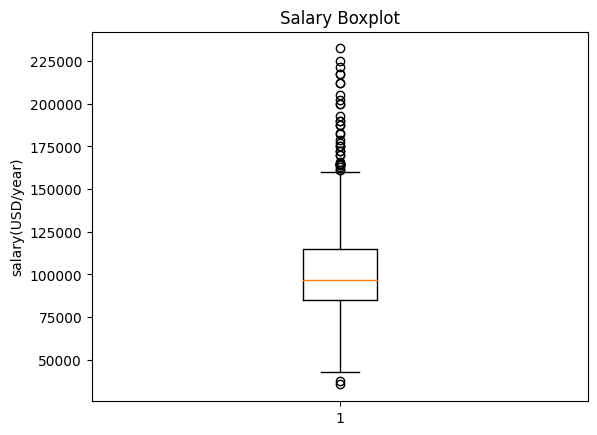

In [ ]:
#Plotting box plots to determine the presence of outliers
plt.boxplot(salary['salary_avg'])
plt.title('Salary Boxplot')
plt.ylabel('salary(USD/year)')

From the boxplot, we can see that there are indeed some outliers. We want to eliminate the effect of significant outliers (unreasonably high/low wages). So here we use the IQR technique to discriminate and control the outliers.

In [ ]:
# Calculates the interquartile range (IQR) for the 'salary_avg', 'salary_min', and 'salary_max' columns.
# An outlier is defined as the value below Q1-1.5IQR or above Q3+1.5IQR.
# Remove those outliers from these columns from the dataset.
Q1 = salary[['salary_avg', 'salary_min', 'salary_max']].quantile(0.25)
Q3 = salary[['salary_avg', 'salary_min', 'salary_max']].quantile(0.75)
IQR = Q3 - Q1

salary = salary[~((salary[['salary_avg', 'salary_min', 'salary_max']] < (Q1 - 1.5 * IQR)) |(salary[['salary_avg', 'salary_min', 'salary_max']] > (Q3 + 1.5 * IQR))).any(axis=1)]

Text(0, 0.5, 'salary(USD/year)')

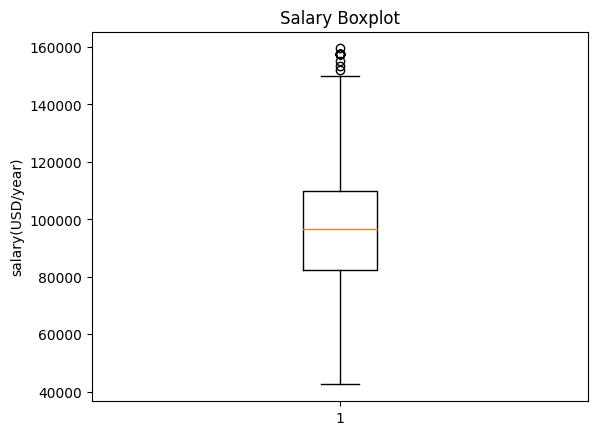

In [ ]:
#Checking -- New boxplot after removing outliers
plt.boxplot(salary['salary_avg'])
plt.title('Salary Boxplot')
plt.ylabel('salary(USD/year)')

Now that we have successfully eliminated the outliers, we need to check if there are some wrong entries. From the code above, the dataset does not have any missing data. Since the dataset has the columns min_salary, max_salary, and avg_salary, there should not be any data entry errors (wrong data type, impossible data, etc.). We also found that there are no duplicate entries in the dataset we cleaned. Therefore, we can say that our cleaned dataset has no incorrect entries.

In [ ]:
# Summary Statistics
summary_stats = salary[['salary_avg', 'salary_min', 'salary_max']].describe()
print(summary_stats)

          salary_avg     salary_min     salary_max
count     957.000000     957.000000     957.000000
mean    98088.822591   81107.289154  115070.356029
std     23035.329127   18857.938363   30207.927602
min     42500.000000   37577.000000   45000.000000
25%     82500.000000   70000.000000   93120.000000
50%     96500.000000   77000.000000  116000.000000
75%    110000.000000   90000.000000  130764.000000
max    159500.000000  130000.000000  195000.000000


### Explore several factors that may affect salaries: companies, locations, languages, and benefit offerings

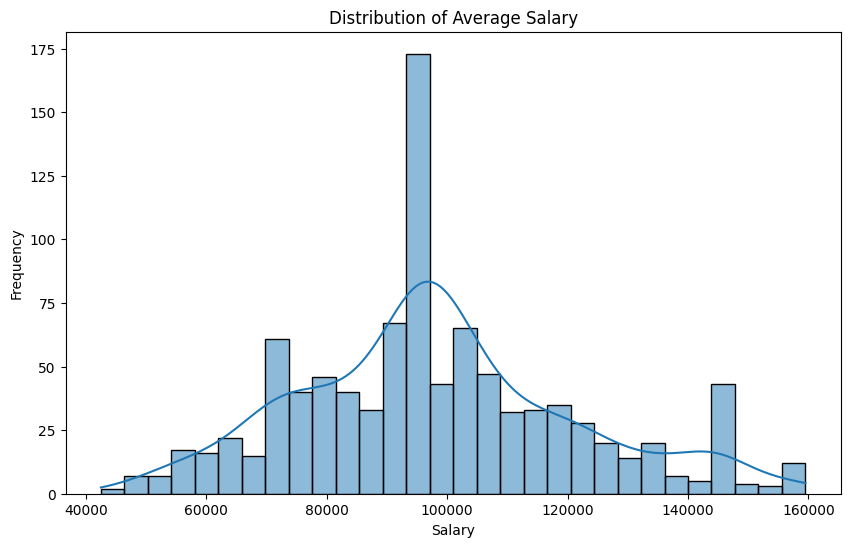

In [ ]:
# Distribution of Salaries
plt.figure(figsize=(10, 6))
sns.histplot(data=salary, x='salary_avg', bins=30, kde=True)
plt.title('Distribution of Average Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# number of unique company_name in the dataset
num_companies = salary['company_name'].nunique()
num_companies

495

The number of companies we have is so large that for a more visual analysis we will take the top 10 companies that offer the most jobs. Note that the table of job offers we provide below only gives the reader a visual representation of which companies dominate the market, and we still consider all companies in our analysis, not just the ten companies.

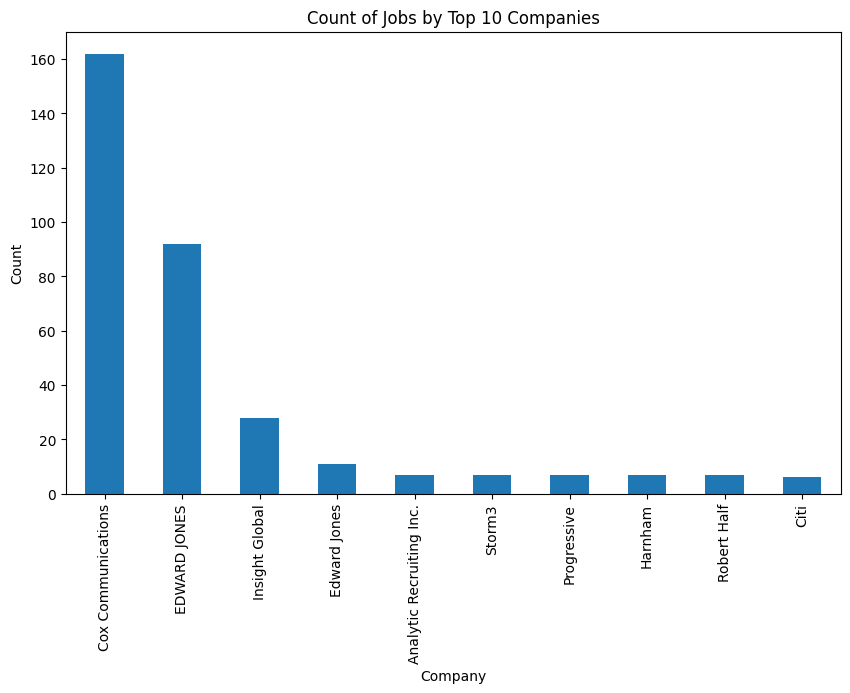

In [ ]:
# generate the bar plot, show the top 10 companies with the highest job counts are selected. We find that Cox Cimmunications has the most job count.
top_10_companies = salary['company_name'].value_counts().nlargest(10)

# Visualization of top 10 companies
plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar')
plt.title('Count of Jobs by Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

In [ ]:
# number of unique locations in the dataset
num_locations = salary['location'].nunique()

print("There are {} unique locations in the dataset.".format(num_locations))

There are 168 unique locations in the dataset.


Similarly, we have arranged the first 10 positions of the location to make a more intuitive representation.

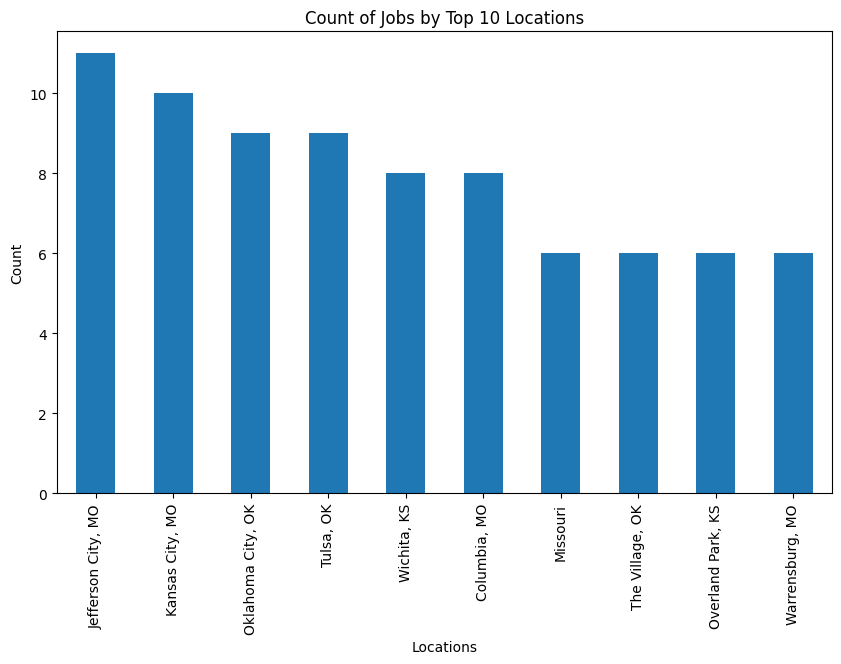

In [ ]:
# generate a bar plot of the top 10 job locations based on the count of jobs available in each location, we find that Jefferson City, MO has the most count of jobs.

Location = salary[(salary['location'] != 'Anywhere') & (salary['location'] != ' Anywhere ') & (salary['location'] != 'United States')
& (salary['location'] != '  United States   ')]
top_10_locations = Location['location'].value_counts().nlargest(10)

# Visualization of Top 10 locations
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('Count of Jobs by Top 10 Locations')
plt.xlabel('Locations')
plt.ylabel('Count')
plt.show()

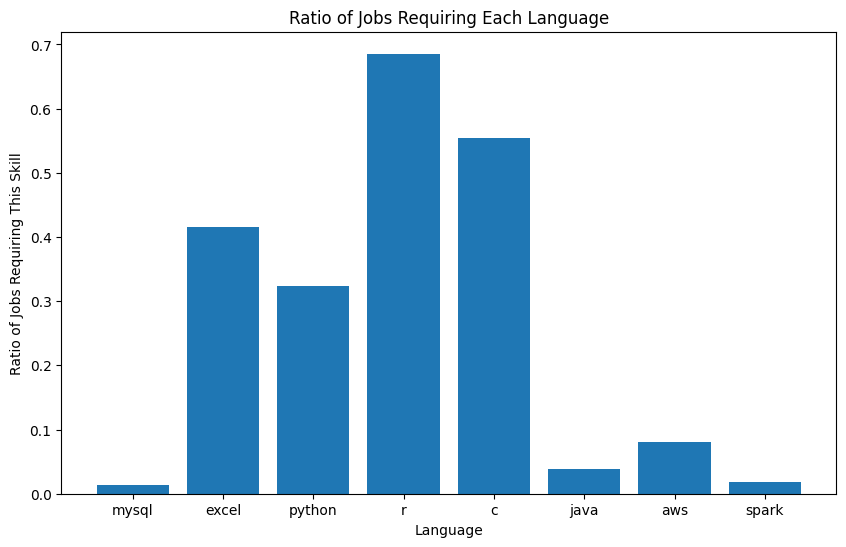

In [ ]:
# generate a bar plot and visualization and the percentage of each language that is in demand, we find the highest ratio of jobs requiring skill is r language, mysql is the lowest ratio of jobs
# requiring language.
Languages = ['mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark']
ratios = [salary[lang].mean() for lang in Languages]

plt.figure(figsize=(10, 6))
plt.bar(Languages, ratios)
plt.xlabel('Language')
plt.ylabel('Ratio of Jobs Requiring This Skill')
plt.title('Ratio of Jobs Requiring Each Language')
plt.show()

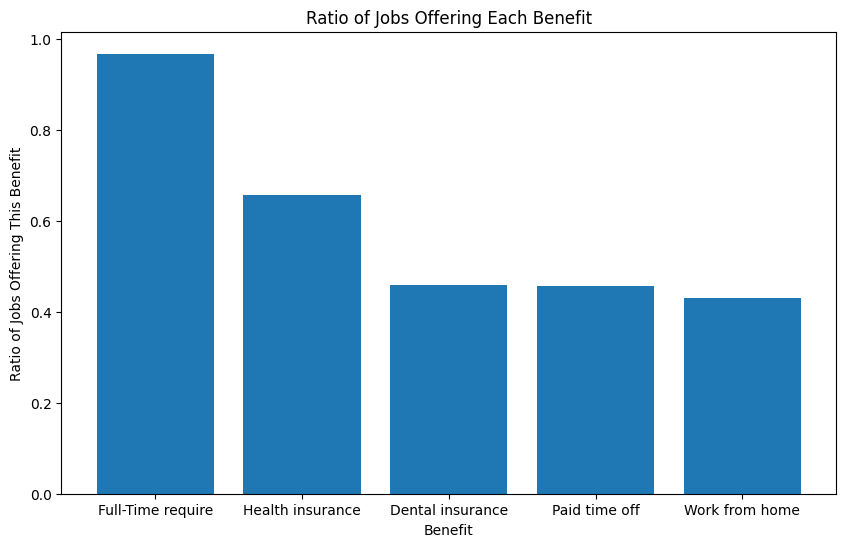

In [ ]:
# provide information for Companys' benefit offerings, we find that ratio of full-time require more than work from home.
benefits = ['Full-Time require', 'Health insurance', 'Dental insurance', 'Paid time off', 'Work from home']
ratios = [salary[b].mean() for b in benefits]

# Visualization of Companys' benefit offerings
plt.figure(figsize=(10, 6))
plt.bar(benefits, ratios)
plt.xlabel('Benefit')
plt.ylabel('Ratio of Jobs Offering This Benefit')
plt.title('Ratio of Jobs Offering Each Benefit')
plt.show()

# **Data Analysis & Results**

In this section we will begin our data analysis with the goal of finding the effect of four variables on employee wages: company size, location, language required, and benefits offered by the company. In this section we will use correlation tests, linear regression to complete the analysis of the data and visualize them.

In this section we also complete a predictive model that predicts the likely salary of a job from the input variables. See the prediction section for more details.

### Correlation between company size and salary

After presenting the jobs offered by the companies we analyzed the number of jobs offered and their corresponding wages to determine whether larger companies (those offering more jobs) would have certain characteristics in terms of wages, such as whether they would offer higher or lower wages.

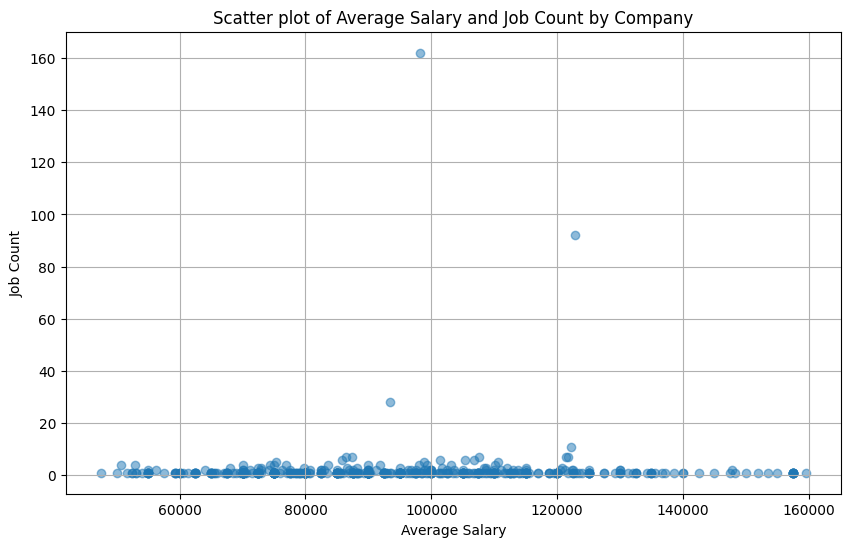

In [ ]:
# generate a scatter plot and show the relationship between the average salary and the job count for each company in the dataset. We find that about 165 jobs has about 90000 average salary.
company_job_counts = salary['company_name'].value_counts()
company_avg_salaries = salary.groupby('company_name')['salary_avg'].mean()
df_correlation = pd.DataFrame({'Job Count': company_job_counts, 'Average Salary': company_avg_salaries})

# visualize the correlation between the average salary and the job count
plt.figure(figsize=(10, 6))
plt.scatter(df_correlation['Average Salary'], df_correlation['Job Count'], alpha=0.5)
plt.title('Scatter plot of Average Salary and Job Count by Company')
plt.xlabel('Average Salary')
plt.ylabel('Job Count')
plt.grid(True)
plt.show()

In [ ]:
#Calculate the Pearson correlation coefficient between average salary and number of jobs
correlation = df_correlation['Average Salary'].corr(df_correlation['Job Count'])
print(f'The correlation between average salary and job count is {correlation:.2f}')

The correlation between average salary and job count is 0.04


The scatter plot shows that there is no statistical correlation between the size of the company (as reflected in the number of jobs offered) and the wage, and that even companies offering small jobs can offer very high wages. The wages offered by those large companies are still within the normal distribution rather than extreme values. We therefore conclude that firm size has a limited effect on wage levels. This is supported by our calculation of the Pearson correlation coefficient

### Correlation between location and salary

We then used regression analysis to analyze the relationship between location and salary, and we wanted to know whether location affects the level of salary

In [ ]:
#Conduct regressivity analysis
model_formula = 'salary_avg ~ C(location)'
results = smf.ols(formula=model_formula, data=salary).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             salary_avg   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.406
Date:                Thu, 15 Jun 2023   Prob (F-statistic):            0.00156
Time:                        02:06:00   Log-Likelihood:                -10846.
No. Observations:                 957   AIC:                         2.203e+04
Df Residuals:                     789   BIC:                         2.284e+04
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

The R-squared (coefficient of determination) is 0.229, indicating that the variation in location (location) on average wage (salary_avg) explains 22.9% of the model.

The adjusted R-squared (adjusted coefficient of determination) is 0.066, a value that takes into account the number of independent variables in the model, further indicating that location has a relatively low explanatory power for average wages.

The F-statistic (F-statistic) is 1.406, corresponding to a probability (Prob (F-statistic)) of 0.00156. This probability is used to test whether location has a significant effect on average wages. Since the probability is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that location has a statistically significant effect on average wages.

Overall, this regression model suggests that location has some explanatory power on average wages, but the explanatory power is relatively low. Other factors not considered may have a greater impact on average wages. Also, it should be noted that this model is based on the assumption of a linear relationship, while the actual situation may involve more complex non-linear relationships, and we will make further and more analysis to refine our results afterwards.

# **Correlation between Language  and salary**

Part 1: relationship between different programming languages themselves and salary

In this section we want to find the relationship between a specific programming language and salary, for example, how the mastery of a programming language affects the salary.

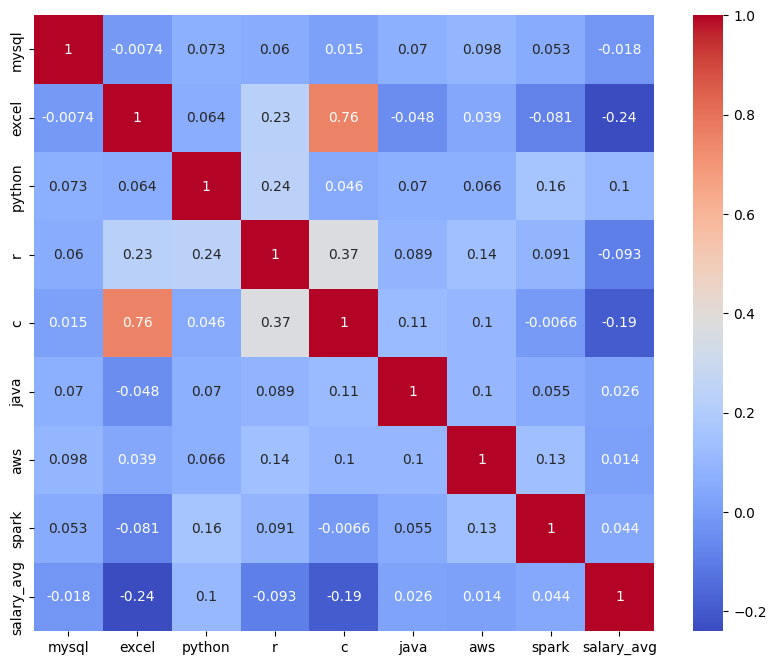

In [ ]:
features = ['mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark', 'salary_avg']
correlation = salary[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

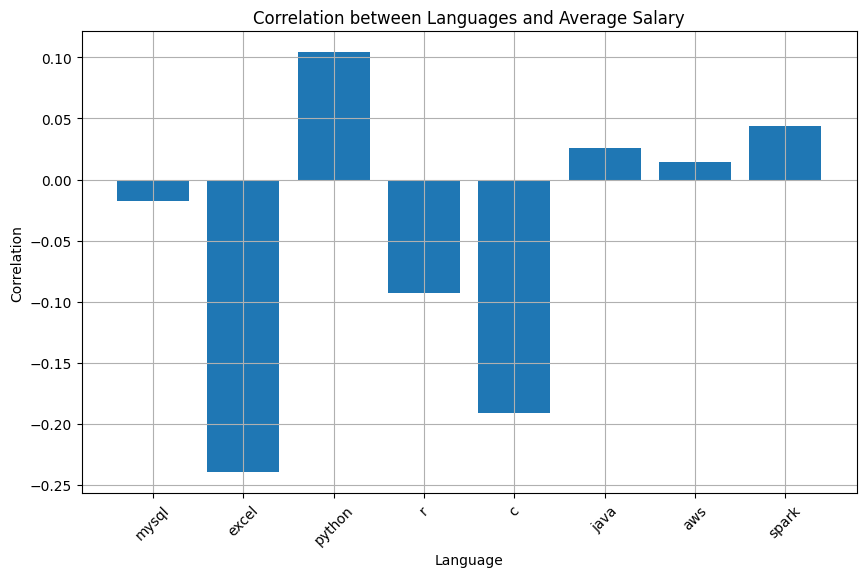

In [ ]:
language_correlation = correlation['salary_avg'].drop('salary_avg')
plt.figure(figsize=(10, 6))
plt.bar(language_correlation.index, language_correlation.values)
plt.xlabel('Language')
plt.ylabel('Correlation')
plt.title('Correlation between Languages and Average Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
print(correlation["salary_avg"])

mysql        -0.017704
excel        -0.239898
python        0.104076
r            -0.092900
c            -0.191569
java          0.026157
aws           0.014137
spark         0.043505
salary_avg    1.000000
Name: salary_avg, dtype: float64


Based on the analysis, we can draw the following conclusions about the correlation between programming languages and salaries

1. MySQL: No significant correlation
2. Excel: Negative correlation
3. Python: Positive correlation
4. R: Weak negative correlation
5. C: Negative correlation
6. Java: No significant correlation
7. AWS: No significant correlation
8. Spark: No significant correlation


Part 2: Correlation between numbers of coding skills and average salary

Prediction of the correlation between the number of languages mastered and wages using a simple linear regression model

Mean Squared Error: 477963381.54893875
R-squared: 0.020415398353847203


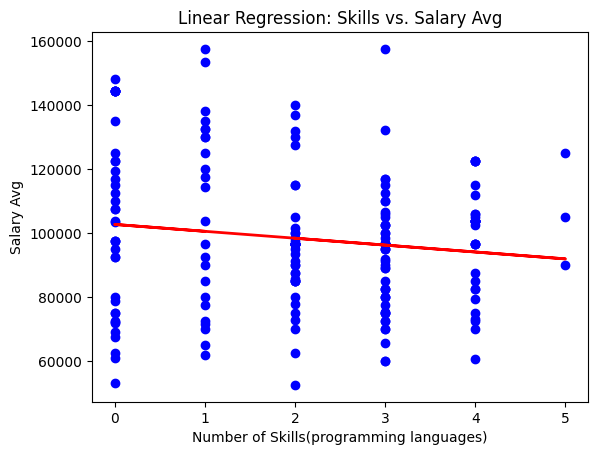

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = salary[['skills']]
y = salary['salary_avg']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')
plt.xlabel('Number of Skills(programming languages)')
plt.ylabel('Salary Avg')
plt.title('Linear Regression: Skills vs. Salary Avg')
plt.show()



oops, we find that the R-squared of the simple linear model is very low, perhaps because the correlation between the data does not show a linear relationship, let's try a polynomial regression model instead



Mean Squared Error: 472691176.06092215
R-squared: 0.031220768623089534


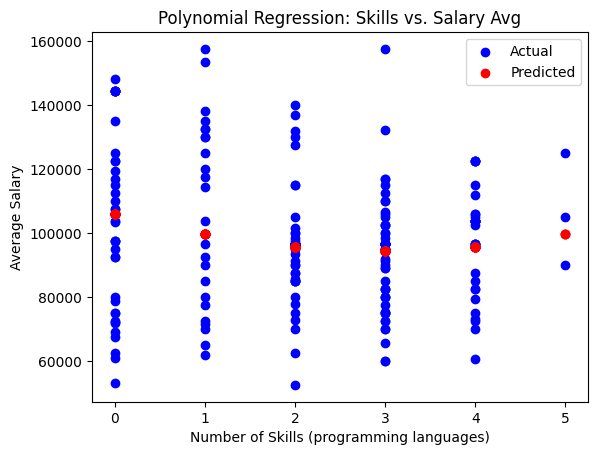

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = salary[['skills']]
y = salary['salary_avg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

# Visualize the actual and predicted values using a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')

# Add a legend to the plot
plt.legend()

# Set the labels for the X and Y axes, and title of the plot
plt.xlabel('Number of Skills (programming languages)')
plt.ylabel('Average Salary')
plt.title('Polynomial Regression: Skills vs. Salary Avg')

# Display the plot
plt.show()

However, the multinomial regression also does not perform well (although there is some improvement) so we do not think there is a strong correlation between the number of languages mastered and salary levels - instead, according to the model, they show a very weak negative correlation, which we think may be due to the fact that companies prefer to recruit employees who are fluent in certain languages rather than those who can use multiple computer languages in general

# **Correlation between employee benefits and wages**

Part 1: relationship between different programming languages themselves and salary

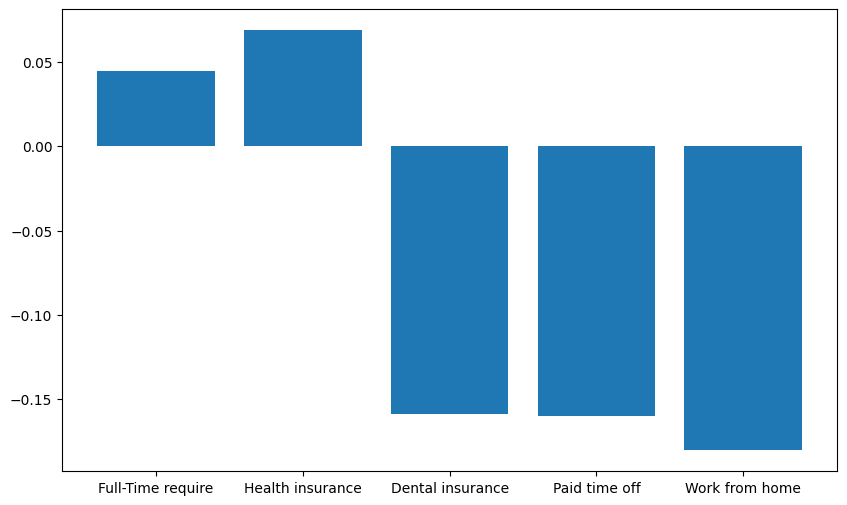

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

benefits = ['Full-Time require', 'Health insurance', 'Dental insurance', 'Paid time off', 'Work from home']

# Create an empty dictionary to store the benefit correlations
benefit_correlations = {}

# Calculate the correlation between the 'salary_avg' column and each benefit
for benefit in benefits:
    correlation = salary['salary_avg'].corr(salary[benefit])
    benefit_correlations[benefit] = correlation

# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Plot a bar chart of the benefit correlations
plt.bar(benefit_correlations.keys(), benefit_correlations.values())

# Set the fontsize of the tick labels
plt.tick_params(labelsize=10)

# Display the plot
plt.show()

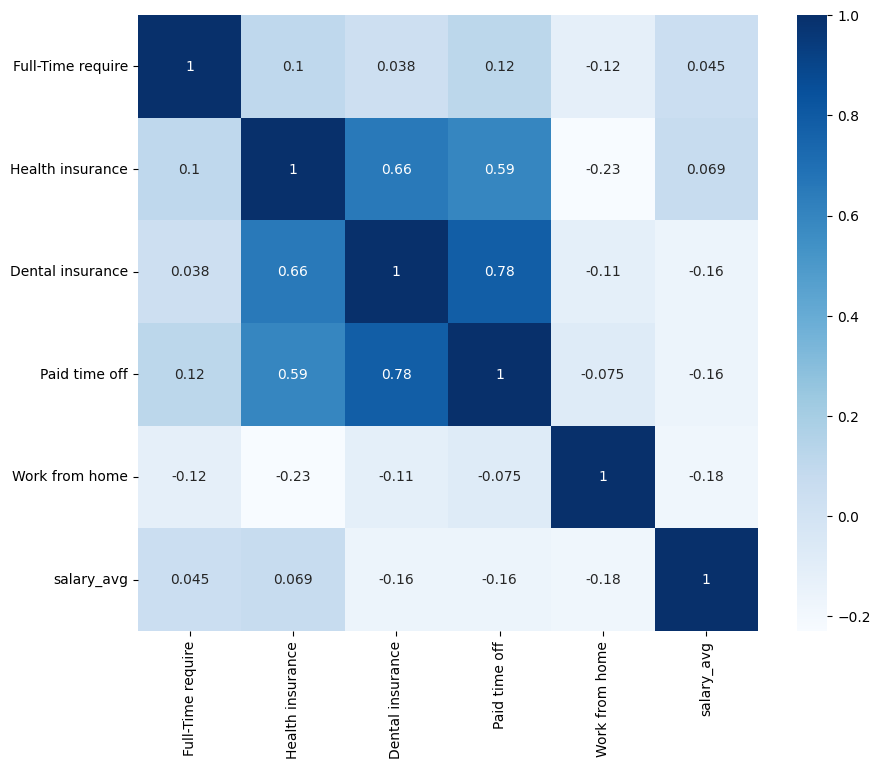

In [ ]:
features = benefits + ['salary_avg']

# Calculate the correlation matrix
correlation = salary[features].corr()

# Create a figure and set its size
plt.figure(figsize=(10, 8))

# Plot the correlation matrix as a heatmap
# Annotate the heatmap with the correlation values
# Use the "Blues" colormap for the heatmap colors
sns.heatmap(correlation, annot=True, cmap="Blues")

# Display the plot
plt.show()


In [ ]:
print(correlation["salary_avg"])

Full-Time require    0.044928
Health insurance     0.068803
Dental insurance    -0.158900
Paid time off       -0.159726
Work from home      -0.180352
salary_avg           1.000000
Name: salary_avg, dtype: float64


Based on the analysis, we can draw the following conclusions about the correlation between benefits and salaries

1. Full-Time require: No significant correlation
2. Health insurance: Positive correlation
3. Dental insurance: Negative correlation
4. Paid time off: Negative correlation
5. Work from home: Negative correlation

Part 2: Correlation between numbers of benefits and average salary

In [ ]:
salary['total_benefits'] = salary[['Health insurance', 'Dental insurance', 'Paid time off', 'Work from home', 'mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark']].sum(axis=1)
salary.loc[salary['Full-Time require'] == 0, 'total_benefits'] = 0

Mean Squared Error: 471606992.7090311
R-squared: 0.03344279934316641


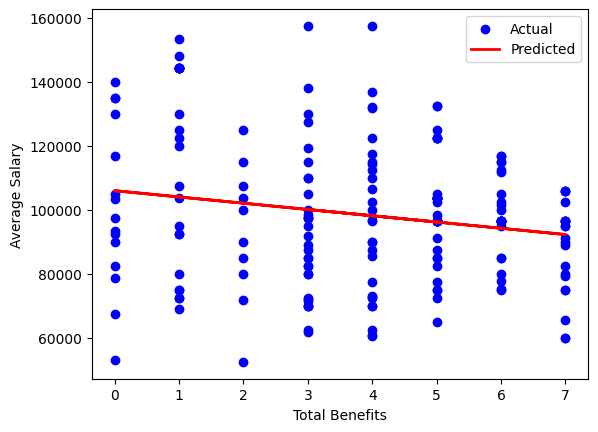

In [ ]:
X = salary['total_benefits'].values.reshape(-1, 1)
y = salary['salary_avg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and train it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

# Visualize the actual and predicted values using a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')

# Add legend to the plot
plt.legend()

# Set the labels for the X and Y axes
plt.xlabel('Total Benefits')
plt.ylabel('Average Salary')

# Display the plot
plt.show()


Again, after finding that the model did not perform well we changed to a different model, this time we chose to use Random Forest

Mean Squared Error: 473099592.4889021
R-squared: 0.030383720306517703


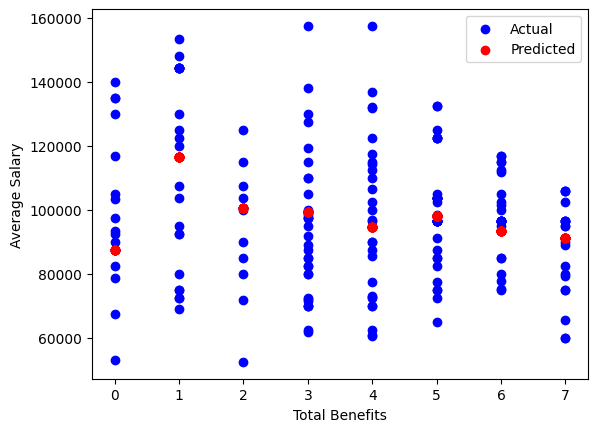

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the predictor variable (X) and the target variable (y)
X = salary['total_benefits'].values.reshape(-1, 1)
y = salary['salary_avg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model and train it on the training data
model = RandomForestRegressor(random_state=45)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

# Visualize the actual and predicted values using a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.legend()

# Set the labels for X and Y axes
plt.xlabel('Total Benefits')
plt.ylabel('Average Salary')

# Display the plot
plt.show()


However, we find that both linear regressions and random forests perform very poorly - which we believe indicates that there is no strong correlation between the number of benefits and wages.

# Predictions

After performing the analysis we want to complete a prediction program that is able to predict the possible salary of a position based on the input characteristic variables.We will first build the model using some of the variables and then bring in all of them to see what the difference is. We will also use multiple models for comparison

Here is a program to make predicitions on a person's salary based on the programming languages he knows. The input variable is an array with 8 binary entries (0 or 1) each corresponds to whether he knows the corresponding language or not. For example, if the first entry of the input is 1, it shows the person knows mysql.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

X = salary[['mysql', 'excel', 'python', "r", "c", "java", "aws", "spark"]]
y = salary['salary_avg']

# Perform one-hot encoding for the skills columns
encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2, 3, 4, 5, 6, 7])], remainder='passthrough')
X_encoded = encoder.fit_transform(X)

model = LinearRegression()
model.fit(X_encoded, y)

# Make predictions on new data
new_skills = [[1, 0, 1, 0, 0, 1, 1, 1]]  # Example new skills to predict salary for (mysql: 1, excel: 0, python: 1, etc.)
new_skills_encoded = encoder.transform(new_skills)
predictions = model.predict(new_skills_encoded)

print("Your estimated salary is:", predictions)


Your estimated salary is: [100864.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


## **Random Forest 1**

In [ ]:
#predictions

# Preprocessing the data first.
# Convert all jobs' company_name that are not from top 8 companies to 'other'.
# Convert all jobs' location that are not from top 8 location to 'other'.
# Then convert  company_name and location to numerical variable
from sklearn.ensemble import AdaBoostRegressor
import sklearn.metrics as mt

data = salary.copy()
data['location'] = data['location'].apply(lambda i: i.strip())
top_10_locations = data['location'].value_counts().nlargest(8)
top_10_companies = data['company_name'].value_counts().nlargest(4)
data['location'] = data['location'].apply(lambda i: i if i in top_10_locations else 'other')
data['company_name'] = data['company_name'].apply(lambda i: i if i in top_10_companies else 'other')
data = data.drop(columns=['date_time','salary_min', 'salary_max', 'Health insurance', 'Dental insurance'])
data = pd.get_dummies(data, columns=['company_name', 'location'])


y = data['salary_avg']
X = data.drop(columns=['salary_avg'])

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8)
train_X_2 = train_X.copy()
clf = RandomForestRegressor()
clf.fit(train_X, train_y)
y_predicted = clf.predict(test_X)

linear = AdaBoostRegressor(base_estimator=RandomForestRegressor(), n_estimators=15, learning_rate=0.1)
linear.fit(train_X_2, train_y)
y_predicted_2 = linear.predict(test_X)

mt.mean_absolute_error(test_y, y_predicted), mt.mean_absolute_error(test_y, y_predicted_2), mt.median_absolute_error(test_y, y_predicted), mt.median_absolute_error(test_y, y_predicted_2), mt.mean_squared_error(test_y, y_predicted), mt.mean_squared_error(test_y, y_predicted_2)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


(15323.85122685061,
 15323.174183025782,
 10235.661138658506,
 10705.610602236637,
 453881079.1130738,
 436139202.62457156)

In [ ]:
print("Mean Absolute Error:", mt.mean_absolute_error(test_y, y_predicted))

Mean Absolute Error: 15323.85122685061


In the above model we have selected only some variables that we think are representative for prediction, next we bring the challenge to all the variables to complete the prediction model, we have used several different methods for prediction

## **LinearRegression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Select the features to be used
features = ['mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark', 'Full-Time require', 'Health insurance', 'Dental insurance', 'Paid time off', 'Work from home']

# Set the feature variable X and the target variable y
X = salary[features]
y = salary['salary_avg']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the prediction performance of the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 18309.070694756752


## **Gradient Boosting Regressor**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
salary['location'] = le.fit_transform(salary['location'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Select the features for prediction
features = ['location', 'mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark', 'Full-Time require', 'Health insurance', 'Dental insurance', 'Paid time off', 'Work from home']
X = salary[features]
y = salary['salary_avg']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Evaluate the model's performance on the test set
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Use the trained model to predict salaries for new job positions
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 15694.32089114158


## **SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1.0, 10.0],
    'degree': [2, 3, 4]
}

# Create the SVR model
svr = SVR()

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameter combination and corresponding score
print("Best Parameters: ", grid_search.best_params_)
# Use the best parameters for prediction
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Best Parameters:  {'C': 10.0, 'degree': 2, 'kernel': 'linear'}
Mean Absolute Error: 16328.99022476399


## **Random Forest 2**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a Random Forest Regressor model
rfr = RandomForestRegressor(n_estimators=100, random_state=45)

# Train the model
rfr.fit(X_train, y_train)

# Make predictions
y_pred = rfr.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 14414.76860441381


For the wage forecasting task, we focused our attention on Mean Absolute Error (MAE), as it provides an intuitive interpretation of the forecast results and is insensitive to outliers.


Although our model is not perfect, by comparing the models we can find that Random Forest performs best when dealing with complex features.


This is because random forest is an integrated approach, consisting of multiple decision trees. Each tree can learn feature relationships in the data autonomously, including nonlinear relationships. When there are complex nonlinear relationships between features, random forest can better capture these patterns, while linear models such as linear regression, gradient regression and SVR may not be able to effectively model nonlinear relationships.



On the other hand, random forests can provide an assessment of the importance By calculating the importance of each feature in the random forest, we can understand which features contribute more to the prediction results. This helps to filter and select the most relevant features and reduce the influence of irrelevant or redundant features, thus improving the performance of the model.




In summary, random forests outperform linear models, such as linear regression, gradient regression, and SVR, in dealing with complex features because of its ability to model nonlinear relationships and feature importance assessment, which makes random forests a powerful tool for dealing with complex features and achieving high-performance predictions.

Originally, we expected that adding more variables would make the results worse, because more variables means more interference - well, precisely because of the ability of the random forest to handle abstract features, it performs better (although only a little) after introducing more variables

#Ethics & Privacy

In our utilization of the Glassdoor jobs dataset, we recognize the possibility of inherent biases. Our exploration into various factors such as job titles may be limited due to the exclusive use of this dataset. With the rapid advancement of technology, new job roles are constantly emerging, and these might not be fully represented in our dataset. Therefore, we acknowledge that our findings may not entirely reflect the broader job market, especially those roles absent from our dataset. To mitigate this, we will endeavor to incorporate additional datasets in our analysis to enhance the representativeness of our research.

When investigating the influence of company ratings, we must consider that these ratings are often subjective, based on individual perceptions and experiences. As such, a certain degree of bias is inevitable. We will carefully handle potential outliers in the data, possibly caused by personal biases, and employ various statistical methods for comparison in an attempt to minimize the impact of these biases.

As part of our commitment to transparency and consistent checks for biases, we will iteratively review our analysis methods, and remain open to refining our approach as we move forward. If biases are identified in the future, we will make necessary adjustments to our algorithm or analysis.

Regarding data privacy, our dataset mainly comprises generic information about job titles, salary estimates, job descriptions, and ratings, with no personal data included. In the unlikely event that any personal data is found within the datasets, we will promptly de-identify such data to prevent potential re-identification. Our usage of the dataset adheres to its license, which permits its use for research and data analysis without requiring permission. All data used in our study will remain confidential and secure, accessible only by authorized personnel.

We are committed to ensuring our analysis is transparent and will adhere strictly to all relevant data privacy laws and ethical standards throughout our research. We will also seek necessary clearances, including Institutional Review Board (IRB) approval if required.

Finally, we understand the importance of control and transparency in the use of data. If a request is made for data removal, we will comply promptly. The results of our study will not be used for promotional or commercial activities, and we will strive to ensure that our research is conducted in a manner that earns and maintains the trust of all stakeholders.

# Conclusion & Discussion

In this project, we used the Data Analyst Job Postings dataset to examine the various factors that may influence the salaries of data analysts. The variables we studied included the company rating, location (city), benefits such as vacation or insurance availability, and required skills. The primary hypothesis was that the number of coding skills mastered by an individual significantly predicts annual salary. This hypothesis stemmed from the belief that having multiple programming skills can demonstrate a wider range of abilities, making a candidate more attractive to employers and improving their bargaining power in salary negotiations.

Our analyses involved examining the correlations between individual factors and salaries, followed by the development of predictive models. We found that the size of a company does not significantly correlate with wages. Location, on the other hand, was found to have a statistically significant impact on average wages, but the explanatory power was relatively low. Among the programming languages, Python showed a positive correlation with salary, while Excel and C showed negative correlations. Given these findings, we can **reject** the null hypothesis that the number of coding skills mastered, the location of work, and the company one works for have no significant impact on their annual salary. Instead, our data **supports** the alternative hypothesis, indicating that specific coding skills, location, and certain employee benefits do impact the salary of a data analyst. However, it is worth noting that the number of coding skills mastered did not show a strong correlation with salary levels, suggesting that the types of skills may be more important than the quantity.

Finally, there were several limitations to our project. First, our dataset might not be comprehensive enough to capture all the factors that affect salaries. Second, the linear regression models we used might not be able to effectively capture the complex, possibly non-linear relationships between the variables and salaries. Despite these limitations, this work contributes to a better understanding of the factors influencing data analysts' salaries, which can inform individuals and organizations about what to prioritize in career development and recruitment processes. On a societal level, The findings from this study can lead to greater transparency in how salaries are determined in the tech industry. By understanding the factors that truly contribute to salary levels, individuals can have more informed discussions with employers during salary negotiations. Similarly, companies can also ensure they are offering competitive salaries based on concrete data, rather than relying on arbitrary criteria.

# Team Contributions

Zirui Lin: Participated in the completion of data cleaning, analysis/results
, discussion section.

Kunhao Song: Participated in the completion of prediction, Ethics & Privacy, EDA section.

Shiyuan Wang: Participated in the completion of prediction, hypothesis, EDA section.

Xinhao Zhao: Participated in data cleaning, EDA, and salary prediction based on programming skills.

# TimeLine


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/27  |  3 PM | brainstorm topics/questions(all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research |
| 5/2  |  6 PM |  Do background research on topic(all) | Discuss ideal dataset(s) and ethics; draft project proposal |
| 5/3  | 3 PM  | Edit, finalize, and submit proposal(Due date: Wed, May 3); Search for datasets(all)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 5/17  | 6 PM  | Import & Wrangle Data(checkpoint 1 Data Due: Wed, May 17); start on EDA(all) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 5/31  | 12 PM  | Finalize wrangling/EDA; Begin Analysis(checkpoint 2 EDA Due date: Wed, May 31) | Discuss/edit Analysis; Complete project check-in |
| 6/11  | 12 PM  | Complete analysis; Draft results/conclusion/discussion(all)| Discuss/edit full project |
| 6/14  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |